# Magic Carpet

In [1]:
!pip install scikit_posthocs

In [9]:
import os
import pandas as pd
import numpy as np

import pandas as pd
from scipy import stats
import scikit_posthocs as sp

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [10]:
def color_significant(val):
    color = 'green' if val <= 0.05 else 'none'
    return f'background-color: {color}'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab_Notebooks/MagicCarpet/

/content/drive/MyDrive/Colab_Notebooks/MagicCarpet


## 2nd Test


### Path Length Dataset

In [6]:
pathlength_df = pd.read_csv(os.getcwd()  + "/2ndTest/pathLength/pathLength.csv")

pathlength_df['length'] = pd.to_numeric(pathlength_df['length'], errors='coerce')

# delete rows with NaN values
pathlength_df = pathlength_df.dropna()
pathlength_df.head()


,user,technique,length
1,10minionMedex,AnalogSteering,481.4468
2,10minionMedex,WalkingInPlace,485.9280
3,11rafifa,AnalogSteering,483.5557
4,11rafifa,VirtualCircle,508.1756
5,11rafifa,WalkingInPlace,496.0159


#### Summary Statistics

In [7]:
summary_stats_pathlength = pathlength_df.groupby('technique')['length'].describe()
summary_stats_pathlength


,count,mean,std,min,25%,50%,75%,max
technique,,,,,,,,
AnalogSteering,17.0,479.571471,4.030508,471.6001,477.457600,479.87840,481.446800,486.5918
VirtualCircle,17.0,494.773841,11.802905,479.3675,485.976100,491.42110,502.456700,523.2619
WalkingInPlace,16.0,492.633069,12.390834,463.8988,485.926575,495.07205,500.624375,510.2596


- Mean Path Length: The AnalogSteering technique has the shortest mean path length (479.57), suggesting it may be the most efficient for users. The VirtualCircle technique has the longest mean path length (494.77), indicating potentially less efficient navigation compared to the other techniques.
- Variability: The VirtualCircle technique also has the highest standard deviation (11.80), indicating more variability in user performance compared to AnalogSteering (4.03) and WalkingInPlace (12.39).
- Range: The range of path lengths is widest for the VirtualCircle technique (from 479.37 to 523.26), again showing greater variability.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# Step 3: Comparative Analysis using Kruskal-Wallis H test
stat, p_value = kruskal(pathlength_df[pathlength_df['technique'] == 'AnalogSteering']['length'],
                        pathlength_df[pathlength_df['technique'] == 'VirtualCircle']['length'],
                        pathlength_df[pathlength_df['technique'] == 'WalkingInPlace']['length'])

# Print the result of the statistical test
kruskal_test_result = {'Kruskal-Wallis H statistic': stat, 'p-value': p_value}
kruskal_test_result

print(kruskal_test_result)


{'Kruskal-Wallis H statistic': 21.085692041522492, 'p-value': 2.6381540370898225e-05}


In [11]:
groups = {
    'AnalogSteering': pathlength_df[pathlength_df['technique'] == 'AnalogSteering']['length'],
    'VirtualCircle': pathlength_df[pathlength_df['technique'] == 'VirtualCircle']['length'],
    'WalkingInPlace': pathlength_df[pathlength_df['technique'] == 'WalkingInPlace']['length']
}

# Dunn's Test for multiple comparisons
p_values = sp.posthoc_dunn([group for group in groups.values()], p_adjust='bonferroni')
p_values.rename(columns={1: 'AnalogSteering', 2: 'VirtualCircle', 3: 'WalkingInPlace'}, inplace=True)
p_values.index = ['AnalogSteering', 'VirtualCircle', 'WalkingInPlace']

cmap = sns.diverging_palette(133, 0, as_cmap=True)
p_values = p_values.style.applymap(color_significant).format("{:.4f}")
p_values


,AnalogSteering,VirtualCircle,WalkingInPlace
AnalogSteering,1.0000,0.0001,0.0006
VirtualCircle,0.0001,1.0000,1.0000
WalkingInPlace,0.0006,1.0000,1.0000


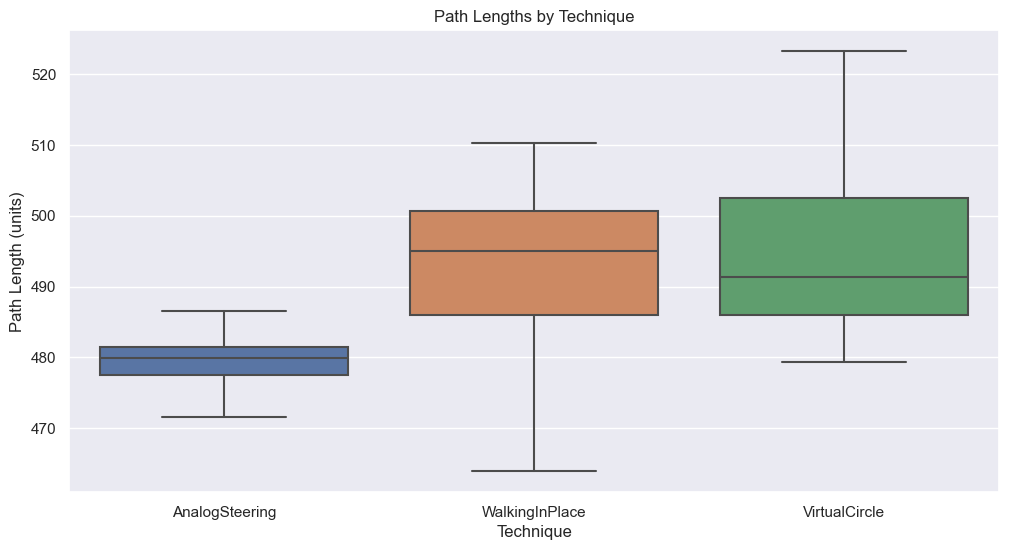

In [ ]:
# Step 4: Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='technique', y='length', data=pathlength_df)
plt.title('Path Lengths by Technique')
plt.xlabel('Technique')
plt.ylabel('Path Length (units)')
plt.show()


**Summary**

- AnalogSteering: This technique has the shortest path lengths with minimal variability, indicating more efficient navigation.
- VirtualCircle: This technique shows the highest path lengths and the widest range, suggesting less efficient and more variable user navigation.
- WalkingInPlace: This technique has intermediate path lengths but higher variability compared to AnalogSteering.

### Path Length Comparison Dataset

In [ ]:
pathlength_df = pd.read_csv("./2ndTest/pathLength/pathLengthForComparison.csv")

pathlength_df['lengthAnalog'] = pd.to_numeric(pathlength_df['lengthAnalog'], errors='coerce')
pathlength_df['lengthCircle'] = pd.to_numeric(pathlength_df['lengthCircle'], errors='coerce')
pathlength_df['lengthwip'] = pd.to_numeric(pathlength_df['lengthwip'], errors='coerce')

# delete rows with NaN values
pathlength_df = pathlength_df.dropna()
pathlength_df.head()


,userAnalog,lengthAnalog,userCircle,lengthCircle,userwip,lengthwip
0,10minionMedex,481.4468,10minionMedex,298.2154,10minionMedex,485.9280
1,11rafifa,483.5557,11rafifa,508.1756,11rafifa,496.0159
2,12barbaraDoHugo,479.8784,12barbaraDoHugo,505.7086,12barbaraDoHugo,510.2596
3,13danielDoHugo,481.0502,13danielDoHugo,483.3121,13danielDoHugo,501.7079
4,14ricardoGaips,486.5918,14ricardoGaips,487.5882,14ricardoGaips,485.9223


In [ ]:

#overall statistics
pathlength_df.describe()

,lengthAnalog,lengthCircle,lengthwip
count,18.000000,18.000000,18.000000
mean,480.994667,483.853928,521.043589
std,7.193620,47.723318,103.935109
min,471.600100,298.215400,463.898800
25%,477.536875,484.597150,486.596400
50%,479.929900,490.301000,495.985950
75%,483.028475,502.351850,503.640950
max,505.189000,523.261900,928.756300


- Mean Path Length: AnalogSteering has the shortest mean path length (480.99), while WalkingInPlace has the longest mean path length (521.04).
- Variability: WalkingInPlace has the highest standard deviation (103.94), indicating greater variability in user performance. VirtualCircle also shows high variability with a standard deviation of 47.72.
- Range: WalkingInPlace has the widest range, with a minimum of 463.90 and a maximum of 928.76.

In [ ]:
# Comparative Analysis using Kruskal-Wallis H test
stat_comparison, p_value_comparison = kruskal(pathlength_df['lengthAnalog'],
                                              pathlength_df['lengthCircle'],
                                              pathlength_df['lengthwip'])

# Print the result of the statistical test
kruskal_test_comparison_result = {'Kruskal-Wallis H statistic': stat_comparison, 'p-value': p_value_comparison}
kruskal_test_comparison_result

{'Kruskal-Wallis H statistic': 16.773512906846236,
 'p-value': 0.00022786517231463628}

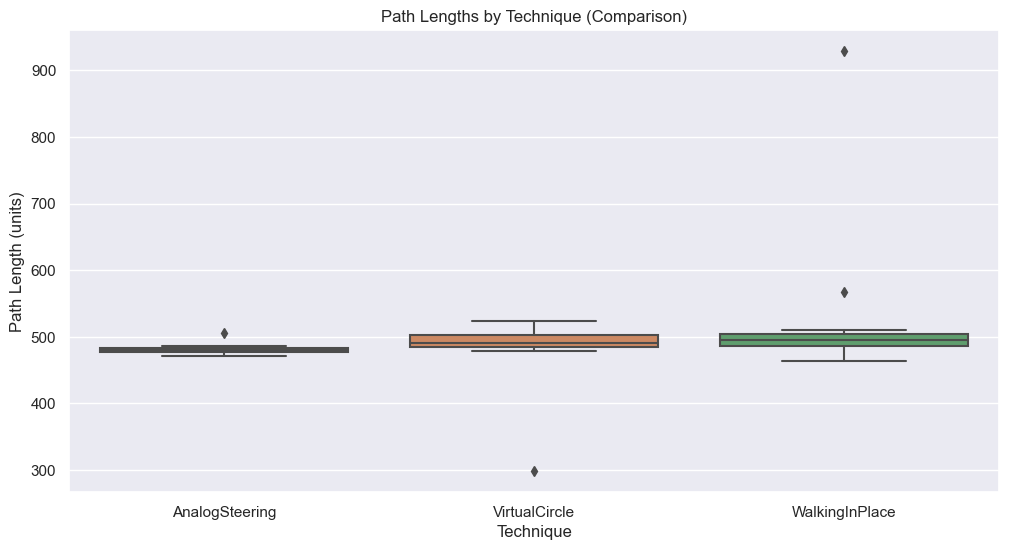

In [ ]:


# Step 4: Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(data=pathlength_df[['lengthAnalog', 'lengthCircle', 'lengthwip']])
plt.title('Path Lengths by Technique (Comparison)')
plt.xlabel('Technique')
plt.ylabel('Path Length (units)')
plt.xticks([0, 1, 2], ['AnalogSteering', 'VirtualCircle', 'WalkingInPlace'])
plt.show()

In [ ]:
# Remove the outlier from the WalkingInPlace technique where path length is greater than 900 and smaller than 300
data_comparison_cleaned = pathlength_df[(pathlength_df['lengthwip'] <= 900) ]
data_comparison_cleaned = data_comparison_cleaned[(data_comparison_cleaned['lengthCircle'] >= 300) ]

# Verify the changes
data_comparison_cleaned.describe()




,lengthAnalog,lengthCircle,lengthwip
count,16.000000,16.000000,16.000000
mean,479.454263,494.319875,497.756269
std,4.132660,12.035730,22.365255
min,471.600100,479.367500,463.898800
25%,477.410975,485.516450,487.931775
50%,479.566450,490.301000,495.985950
75%,481.676575,503.269675,502.352250
max,486.591800,523.261900,567.899200


In [ ]:
# Print the result of the statistical test

stat_comparison_cleaned, p_value_comparison_cleaned = kruskal(data_comparison_cleaned['lengthAnalog'],
                                                            data_comparison_cleaned['lengthCircle'],
                                                            data_comparison_cleaned['lengthwip'])


kruskal_test_comparison_cleaned_result = {'Kruskal-Wallis H statistic': stat_comparison_cleaned, 'p-value': p_value_comparison_cleaned}
kruskal_test_comparison_cleaned_result


{'Kruskal-Wallis H statistic': 19.71875, 'p-value': 5.225499884609502e-05}

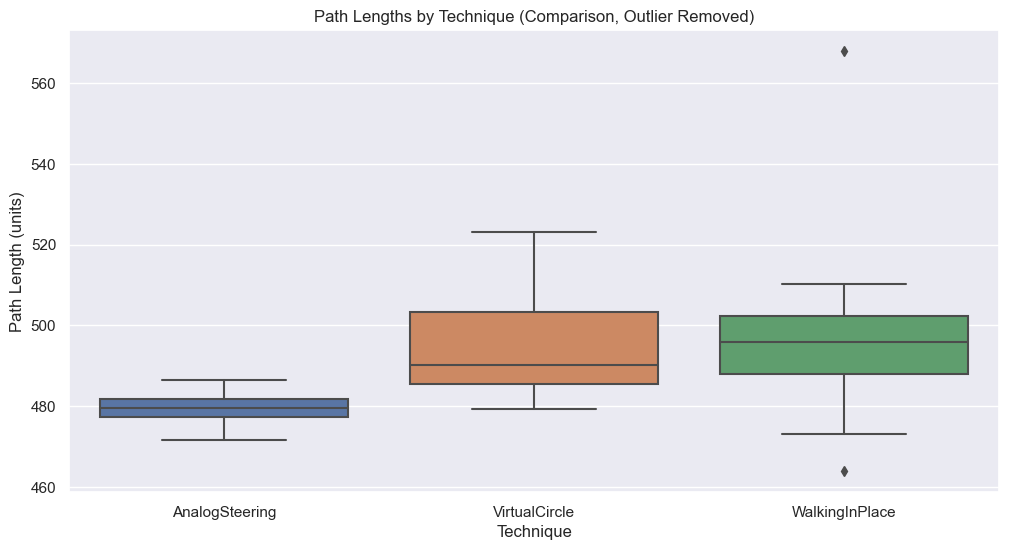

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_comparison_cleaned[['lengthAnalog', 'lengthCircle', 'lengthwip']])
plt.title('Path Lengths by Technique (Comparison, Outlier Removed)')
plt.xlabel('Technique')
plt.ylabel('Path Length (units)')
plt.xticks([0, 1, 2], ['AnalogSteering', 'VirtualCircle', 'WalkingInPlace'])
plt.show()

**Summary**
- AnalogSteering: This technique continues to have the shortest path lengths with minimal variability, indicating efficient navigation.
- VirtualCircle: This technique still shows higher path lengths and greater variability, suggesting less efficient and more variable user navigation.
- WalkingInPlace: After removing the outlier, the path lengths are reduced, and variability is significantly lower, but it still has higher mean path lengths compared to AnalogSteering.

**Conclusion**
- AnalogSteering is the most efficient technique, while VirtualCircle and WalkingInPlace show more variability and higher path lengths